# Project Overview: Enhancing Revenue for NYC Taxi Drivers


In the bustling environment of New York City’s taxi industry, drivers rely significantly on tips to boost their earnings. Recognizing this, we embarked on a project to develop a machine learning model aimed at optimizing the tipping experience for taxi drivers. This initiative, undertaken by Automatidata, focuses on leveraging data to provide actionable insights that could substantially benefit taxi drivers.

# Objective

The primary goal of this project is to build a predictive model that assists taxi drivers by forecasting which passengers are more likely to offer generous tips. By identifying high-potential tipping customers, we aim to enhance drivers' earning opportunities and improve their overall experience.
<br/>   
# Approach



1.   **Ethical Considerations:** We carefully evaluated the ethical implications of our model. Our objective was to ensure that our solution aligns with fair practices and avoids potential negative impacts on both customers and drivers. Adjustments were made to focus on identifying generous tippers rather than those who are less likely to tip, thereby supporting an inclusive approach.
2.   **Feature Engineering:** We employed advanced feature engineering techniques to extract and refine relevant data, such as customer behavior patterns, trip details, and payment methods. This preparation was crucial for creating a robust predictive model.
3.   **Modeling and Evaluation:** Using state-of-the-art tree-based algorithms, we developed and fine-tuned our model. Comprehensive evaluations were conducted to ensure its accuracy and reliability, with results guiding our recommendations for implementation.

<br/>  
# Impact

Our model is designed to provide taxi drivers with insights that can help them prioritize their efforts, leading to increased earnings and a more rewarding driving experience. This solution not only benefits drivers but also fosters a more efficient and dynamic taxi service for the city.

By focusing on predicting generous tippers, we aim to support the livelihood of NYC’s taxi drivers while maintaining equitable service for all passengers. This project exemplifies the potential of data science to create tangible value in real-world applications.



# Build a machine learning model

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: Plan

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?

5.   Can the objective be modified to make it less problematic?



**Question 1:**

Predict if a customer will **not** leave a tip.

**Question 2:**

Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.

**Question 3:**

It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits.

**Question 4:**

No. Effectively limiting equal access to taxis is ethically problematic, and carries a lot of risk.

**Question 5:**

We can build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


**Question 1:**  What features do you need to make this prediction?

Ideally, we'd have behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method.

**Question 2:**  What would be the target variable?


The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%.

**Question 3:**  

This is a supervised learning, classification task. We could use accuracy, precision, recall, F-score, area under the ROC curve, or a number of other metrics. However, we don't have enough information at this time to know which are most appropriate. We need to know the class balance of the target variable.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [ ]:
# Import packages and libraries
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# RUN THIS CELL TO SEE ALL COLUMNS
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA.

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [ ]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [ ]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
...,...,...,...
22694,8.594643,1.098214,7.799138
22695,59.560417,18.757500,52.000000
22696,6.609091,0.684242,6.130896
22697,16.650000,2.077500,11.707049


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [ ]:
# Merge datasets
### YOUR CODE HERE ###
df0 = df0.merge(nyc_preds_means, left_index= True,  right_index = True)
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,14.616667,4.435000,15.845642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,8.594643,1.098214,7.799138
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,6.609091,0.684242,6.130896
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses.

Call `info()` on the new combined dataframe.

In [ ]:
#==> ENTER YOUR CODE HERE
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card.

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [ ]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
df1 = df0.loc[df0["payment_type"]==1]
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it.

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous.

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system.

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [ ]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case.

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  
Refer to this [guide for more information related to fixed-point arithmetic](https://inst.eecs.berkeley.edu/~cs61c/sp06/handout/fixedpt.html), which is an alternative to floating-point arithmetic used in certain cases.

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [ ]:
# Create tip % col
#==> ENTER YOUR CODE HERE
df2 = df1.copy()
df2["tip_percent"] = round((df2["tip_amount"])/(df2["total_amount"]-df2["tip_amount"]), 3)
df2["tip_percent"] = df2["tip_percent"] >= 0.2
df2["generous"] = df2["tip_percent"].apply(lambda x: 1 if x == True else 0)
df2

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,True,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,True,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,False,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,True,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247,True,1
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146,True,1
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000,True,1
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049,False,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15265 non-null  int64  
 1   VendorID               15265 non-null  int64  
 2   tpep_pickup_datetime   15265 non-null  object 
 3   tpep_dropoff_datetime  15265 non-null  object 
 4   passenger_count        15265 non-null  int64  
 5   trip_distance          15265 non-null  float64
 6   RatecodeID             15265 non-null  int64  
 7   store_and_fwd_flag     15265 non-null  object 
 8   PULocationID           15265 non-null  int64  
 9   DOLocationID           15265 non-null  int64  
 10  payment_type           15265 non-null  int64  
 11  fare_amount            15265 non-null  float64
 12  extra                  15265 non-null  float64
 13  mta_tax                15265 non-null  float64
 14  tip_amount             15265 non-null  float64
 15  to

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [ ]:
# Convert pickup and dropoff cols to datetime
df2["tpep_pickup_datetime"] = pd.to_datetime(df2["tpep_pickup_datetime"])
df2["tpep_dropoff_datetime"] = pd.to_datetime(df2["tpep_dropoff_datetime"])
#==> ENTER YOUR CODE HERE

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [ ]:
# Create a 'day' col
df2["day"] = df2["tpep_pickup_datetime"].dt.day_name().str.lower()
#==> ENTER YOUR CODE HERE

In [ ]:
df2

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,True,1,saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,True,1,tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,False,0,friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,True,1,sunday
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,True,1,saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247,True,1,sunday
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146,True,1,thursday
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000,True,1,sunday
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049,False,0,saturday


#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [ ]:
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE
df2["am_rush"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)
df2["am_rush"] = df2["am_rush"].apply(lambda x: 1 if 6 <= x < 10 else 0)

# Create 'daytime' col
#==> ENTER YOUR CODE HERE
df2["daytime"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)
df2["daytime"] = df2["daytime"].apply(lambda x: 1 if 10 <= x < 16 else 0)

# Create 'pm_rush' col
#==> ENTER YOUR CODE HERE
df2["pm_rush"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)
df2["pm_rush"] = df2["pm_rush"].apply(lambda x: 1 if 16 <= x < 20  else 0)
# Create 'nighttime' col
#==> ENTER YOUR CODE HERE
df2["nighttime"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)
df2["nighttime"] = df2["nighttime"].apply(lambda x: 1 if 20 <= x < 24  else 1 if 0 <= x < 6 else 0)

print(df2["am_rush"].value_counts())
print(df2["daytime"].value_counts())
print(df2["pm_rush"].value_counts())
print(df2["nighttime"].value_counts())

0    12785
1     2480
Name: am_rush, dtype: int64
0    10977
1     4288
Name: daytime, dtype: int64
0    11727
1     3538
Name: pm_rush, dtype: int64
0    10306
1     4959
Name: nighttime, dtype: int64


You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [ ]:
df2["am_rush"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)

In [ ]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE
def am_rush(hour):
    if 6 <= hour["am_rush"] < 10:
        val = 1
    else:
        val = 0
    return val

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [ ]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE
df2["am_rush"] = df2.apply(am_rush, axis = 1)
df2["am_rush"].value_counts()

0    12785
1     2480
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [ ]:
df2["daytime"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)

In [ ]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE
def daytime(hour):
    if 10 <= hour["daytime"] < 16:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df2["daytime"] = df2.apply(daytime, axis = 1)
df2["daytime"].value_counts()

0    10977
1     4288
Name: daytime, dtype: int64

In [ ]:
df2["pm_rush"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)

In [ ]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE
def pm_rush(hour):
    if 16 <= hour["pm_rush"] < 20:
        val = 1
    else:
        val = 0
    return val


In [ ]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df2["pm_rush"] = df2.apply(pm_rush, axis = 1)
df2["pm_rush"].value_counts()

0    11727
1     3538
Name: pm_rush, dtype: int64

In [ ]:
df2["nighttime"] = df2["tpep_pickup_datetime"].dt.hour.astype(int)

In [ ]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE
def nighttime(hour):
    if 20 <= hour["nighttime"] <= 24:
        val = 1
    elif 0 <= hour["nighttime"] < 6:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df2["nighttime"] = df2.apply(nighttime, axis =1)
df2["nighttime"].value_counts()

0    10306
1     4959
Name: nighttime, dtype: int64

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [ ]:
# Create 'month' col
df2["month"] = df2["tpep_pickup_datetime"].dt.month_name().str.slice(stop = 3)
df2["month"] = df2["month"].str.lower()
df2["month"]

##df2["month"] = df2["tpep_pickup_datetime"].dt.strftime(%b).str.lower()

0        mar
1        apr
2        dec
3        may
5        mar
        ... 
22692    jul
22693    aug
22695    aug
22697    jul
22698    mar
Name: month, Length: 15265, dtype: object

Examine the first five rows of your dataframe.

In [ ]:

df2["month"].head()

0    mar
1    apr
2    dec
3    may
5    mar
Name: month, dtype: object

In [ ]:
df2

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,True,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,True,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,False,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,True,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,True,1,saturday,0,0,0,1,mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247,True,1,sunday,0,0,0,1,jul
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146,True,1,thursday,0,0,0,1,aug
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000,True,1,sunday,0,0,1,0,aug
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049,False,0,saturday,0,1,0,0,jul


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [ ]:
# Drop columns
drop_columns = ["Unnamed: 0", "tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance",
                   "payment_type", "store_and_fwd_flag", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
                    "improvement_surcharge", "total_amount", "tip_percent"]
df2 = df2.drop(columns = drop_columns)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`.

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [ ]:
# 1. Define list of cols to convert to string
cols_to_str = ["RatecodeID", "PULocationID", "DOLocationID", "VendorID"]
# 2. Convert each column to string
for x in cols_to_str:
    df2[x] = df2[x].astype(str)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  object 
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.9+ MB


Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [ ]:
# Convert categoricals to binary
df2 = pd.get_dummies(df2, drop_first = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int64(6), uint8(338)
memory usage: 6.1 MB


##### Evaluation metric

Before modeling, you must decide on an evaluation metric.

1. Examine the class balance of your target variable.

In [ ]:
# Get class balance of 'generous' col
df2["generous"].value_counts(normalize = True)*100

1    52.636751
0    47.363249
Name: generous, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

F<sub>1</sub> score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data.

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [ ]:
# Isolate target variable (y)
y = df2["generous"]
# Isolate the features (X)
X = df2.drop(columns = ["generous"])
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size =0.2)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`  
 - `max_features`  
 - `max_samples`
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>



In [ ]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)
# 2. Create a dictionary of hyperparameters to tune
#cv_params = {"n_estimators": [200,250,300],
#            "max_depth": [6, 8, None],
#            "min_samples_split": [1, 2],
#            "min_samples_leaf": [1, 2],
#            "max_features":[0.8, 0.9,1.0],
#            "max_samples": [1.0]}
cv_params = {"n_estimators": [300],
            "max_depth": [None],
            "min_samples_split": [2],
            "min_samples_leaf": [1],
            "max_features": [1.0],
            "max_samples": [0.7]}
# 3. Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}
# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, refit = "f1", cv = 4)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time.

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [ ]:
import pickle

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [ ]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [ ]:
write_pickle(path, rf_cv, "rf_cv")

In [ ]:
rf_cv = read_pickle(path, "rf_cv")

In [ ]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Examine the best average score across all the validation folds.

In [ ]:
# Examine best score
rf_cv.best_score_

0.7136009788848705

Examine the best combination of hyperparameters.

In [ ]:
#==> ENTER YOUR CODE HERE
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
ab = pd.DataFrame(rf_cv.cv_results_)
ab

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,45.619144,1.5492,0.246887,0.006088,None,1.0,0.7,1,2,300,"{'max_depth': None, 'max_features': 1.0, 'max_...",0.678247,0.679792,0.672395,0.669244,0.674919,0.004284,1,0.692106,0.677039,0.677367,0.674419,0.680233,0.00695,1,0.72973,0.704259,0.711228,0.709187,0.713601,0.00965,1,0.78967,0.730554,0.754823,0.7542,0.757312,0.021089,1


Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [ ]:
result = make_results("Tuned Random Forest", rf_cv, "f1")
result

,model,precision,recall,F1,accuracy
0,Tuned Random Forest,0.674919,0.757312,0.713601,0.680233


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.


For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.


Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

In [ ]:
# Get scores on test data
#==> ENTER YOUR CODE HERE

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [ ]:
 # Get scores on test data
y_pred = rf_cv.predict(X_test)
rf_test_scores = get_test_scores("Tuned Random Forest Test", y_pred, y_test)
test_result = pd.concat([result, rf_test_scores])
test_result

,model,precision,recall,F1,accuracy
0,Tuned Random Forest,0.674919,0.757312,0.713601,0.680233
0,Tuned Random Forest Test,0.675297,0.779091,0.723490,0.686538


**Question:** How do your test results compare to your validation results?

All scores increased by at most ~0.02.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [ ]:
# 1. Instantiate the XGBoost classifier
import xgboost as xgb
xgb = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [8],
            "min_child_weight": [2],
            "learning_rate": [0.1],
            "n_estimators": [500]}
# 3. Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}
# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring= scoring, cv = 4, refit = "f1")

Now fit the model to the `X_train` and `y_train` data.

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 6min 37s, sys: 607 ms, total: 6min 38s
Wall time: 3min 19s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                  

Get the best score from this model.

In [ ]:
# Examine best score
xgb_cv.best_score_

0.6977560172278552

And the best parameters.

In [ ]:
# Examine best parameters

xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

In [ ]:
# Call 'make_results()' on the GridSearch object

xgb_result = make_results("XGBoost", xgb_cv, "f1")
xgb_result

,model,precision,recall,F1,accuracy
0,XGBoost,0.673074,0.724487,0.697756,0.669669


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

In [ ]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [ ]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_test_scores = get_test_scores("XGBoostTest", xgb_preds, y_test)
xgb_result_combined = pd.concat([xgb_result, xgb_test_scores], axis = 0)
print(xgb_result_combined)
print(test_result)

         model  precision    recall        F1  accuracy
0      XGBoost   0.673074  0.724487  0.697756  0.669669
0  XGBoostTest   0.675660  0.747978  0.709982  0.678349
                      model  precision    recall        F1  accuracy
0       Tuned Random Forest   0.674919  0.757312  0.713601  0.680233
0  Tuned Random Forest Test   0.675297  0.779091  0.723490  0.686538


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

The F<sub>1</sub> score is ~0.01 lower than the random forest model. Both models are acceptable, but the random forest model is the champion.

Plot a confusion matrix of the model's predictions on the test data.

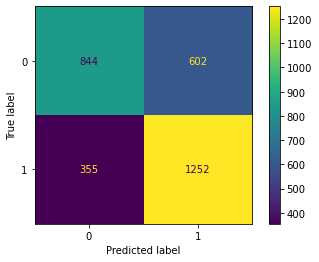

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = rf_cv.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = rf_cv.classes_)
disp.plot(values_format = "")

**Question:** What type of errors are more common in the model?

The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is satisfactory.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

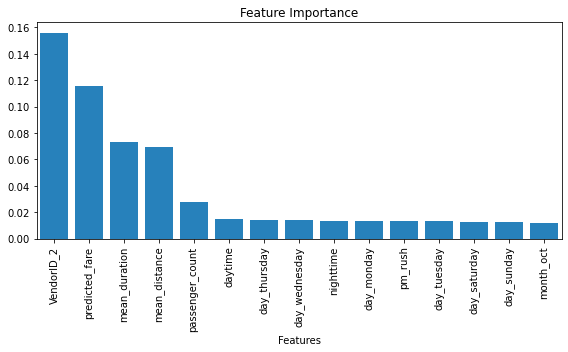

In [ ]:
best_result = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(best_result, index = X.columns)
rf_importances = rf_importances.sort_values(ascending = False)
rf_importances = rf_importances.head(15)
fig = plt.figure(figsize = (8,5))
sns.barplot(x = rf_importances.index, y = rf_importances.values, color = "#0E86D4")
plt.xticks(rotation= 90)
plt.xlabel("Features")
plt.title("Feature Importance")
fig.tight_layout()
plt.show()

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  
Yes, this is model performs acceptably. Its F<sub>1</sub> score was 0.7235 and it had an overall accuracy of 0.6865. It correctly identified ~78% of the actual responders in the test set, which is 48% better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback.  


2. **What was your highest scoring model doing? Can you explain how it was making predictions?**   
Unfortunately, random forest is not the most transparent machine learning algorithm. We know that `VendorID`, `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that `VendorID` is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.  


3. **Are there new features that you can engineer that might improve model performance?**  
There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of \\$5) / fare amount. For example, if the fare were \\$12, the value in this column would be 0.25, because \\$12 to the nearest higher multiple of \\$5 (\\$15) is \\$3, and \\$3 divided by \\$12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of \\$5 may have lower tip percentages than those with fare values just over a multiple of \\$5. We could also do the same thing for fares to the nearest \\$10.

$$
round5\_ratio = \frac{amount\ of\ money\ from\ the\ fare\ amount\ to\ the\ nearest\ higher\ multiple\ of\ \$5}{fare\ amount}
$$

<br>

4. **What features would you want to have that would likely improve the performance of your model?**   
It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash.
It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.
